<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project2</h3>
</div>

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

from datetime import date , datetime , timedelta

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics


## Load and Prepare Data

In [ ]:
df = pd.read_csv('Churn.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df['Exited'].value_counts(normalize=True)* 100

0    79.63
1    20.37
Name: Exited, dtype: float64

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df.groupby( ['Gender'] )['EstimatedSalary'].mean().reset_index()

,Gender,EstimatedSalary
0,Female,100601.541382
1,Male,99664.576931


In [ ]:
pd.crosstab( df['Gender'], df['Exited'] )

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [ ]:
df.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [ ]:
df['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

## Strorytelling - Visualization

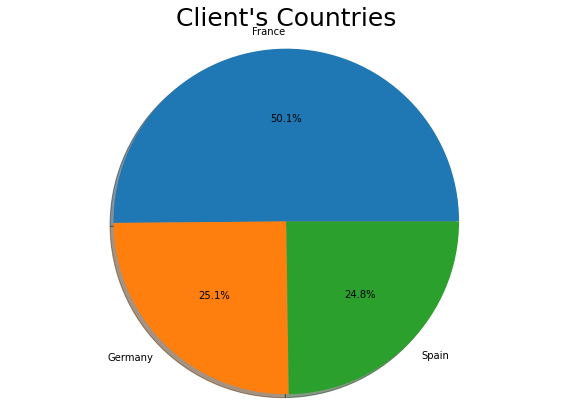

In [ ]:
fig, axs = plt.subplots(figsize=(10, 7))
sizes = [df.Geography[df['Geography']=='France'].count(), df.Exited[df['Geography']=='Germany'].count() , df.Exited[df['Geography']=='Spain'].count()]
axs.pie(sizes, labels=['France', 'Germany','Spain'], autopct='%1.1f%%',shadow=True)
axs.axis('equal')
plt.title("Client's Countries", size = 25)
plt.show()

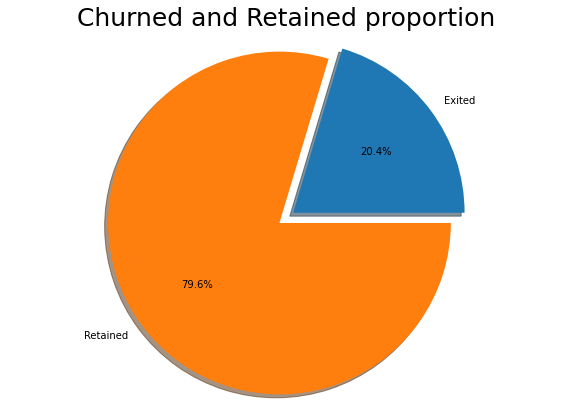

In [ ]:
fig, axs = plt.subplots(figsize=(10, 7))
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
axs.pie(sizes, explode=(0, 0.1), labels=['Exited', 'Retained'], autopct='%1.1f%%',shadow=True)
axs.axis('equal')
plt.title("Churned and Retained proportion", size = 25)
plt.show()

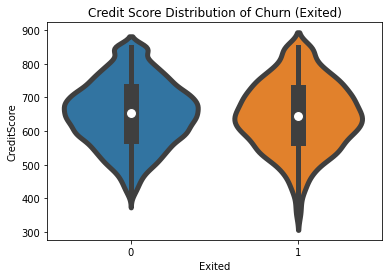

In [ ]:
sns.violinplot( x=df["Exited"], y=df["CreditScore"], linewidth=5)
plt.title("Credit Score Distribution of Churn (Exited)")
plt.show()

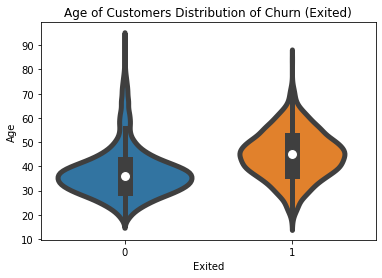

In [ ]:
sns.violinplot( x=df["Exited"], y=df["Age"], linewidth=5)
plt.title("Age of Customers Distribution of Churn (Exited)")
plt.show()

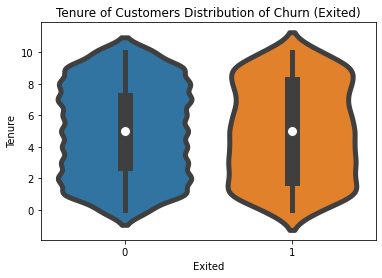

In [ ]:
sns.violinplot( x=df["Exited"], y=df["Tenure"], linewidth=5)
plt.title("Tenure of Customers Distribution of Churn (Exited)")
plt.show()

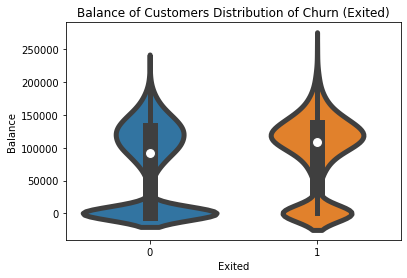

In [ ]:
sns.violinplot( x=df["Exited"], y=df["Balance"], linewidth=5)
plt.title("Balance of Customers Distribution of Churn (Exited)")
plt.show()

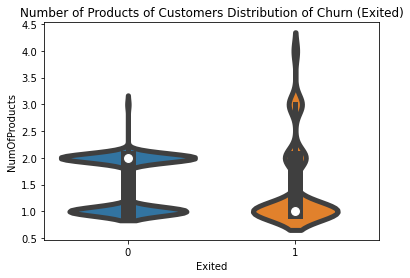

In [ ]:
sns.violinplot( x=df["Exited"], y=df["NumOfProducts"], linewidth=5)
plt.title("Number of Products of Customers Distribution of Churn (Exited)")
plt.show()

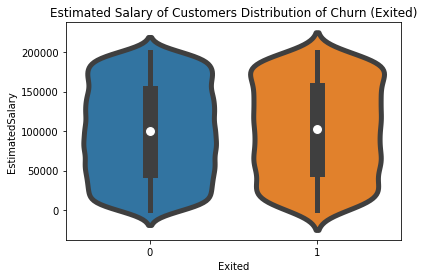

In [ ]:
#sns.catplot(x=df["Exited"], y=df["EstimatedSalary"], hue='Gender',kind="box", data=df)
sns.violinplot( x=df["Exited"], y=df["EstimatedSalary"], linewidth=5)
plt.title("Estimated Salary of Customers Distribution of Churn (Exited)")
plt.show()

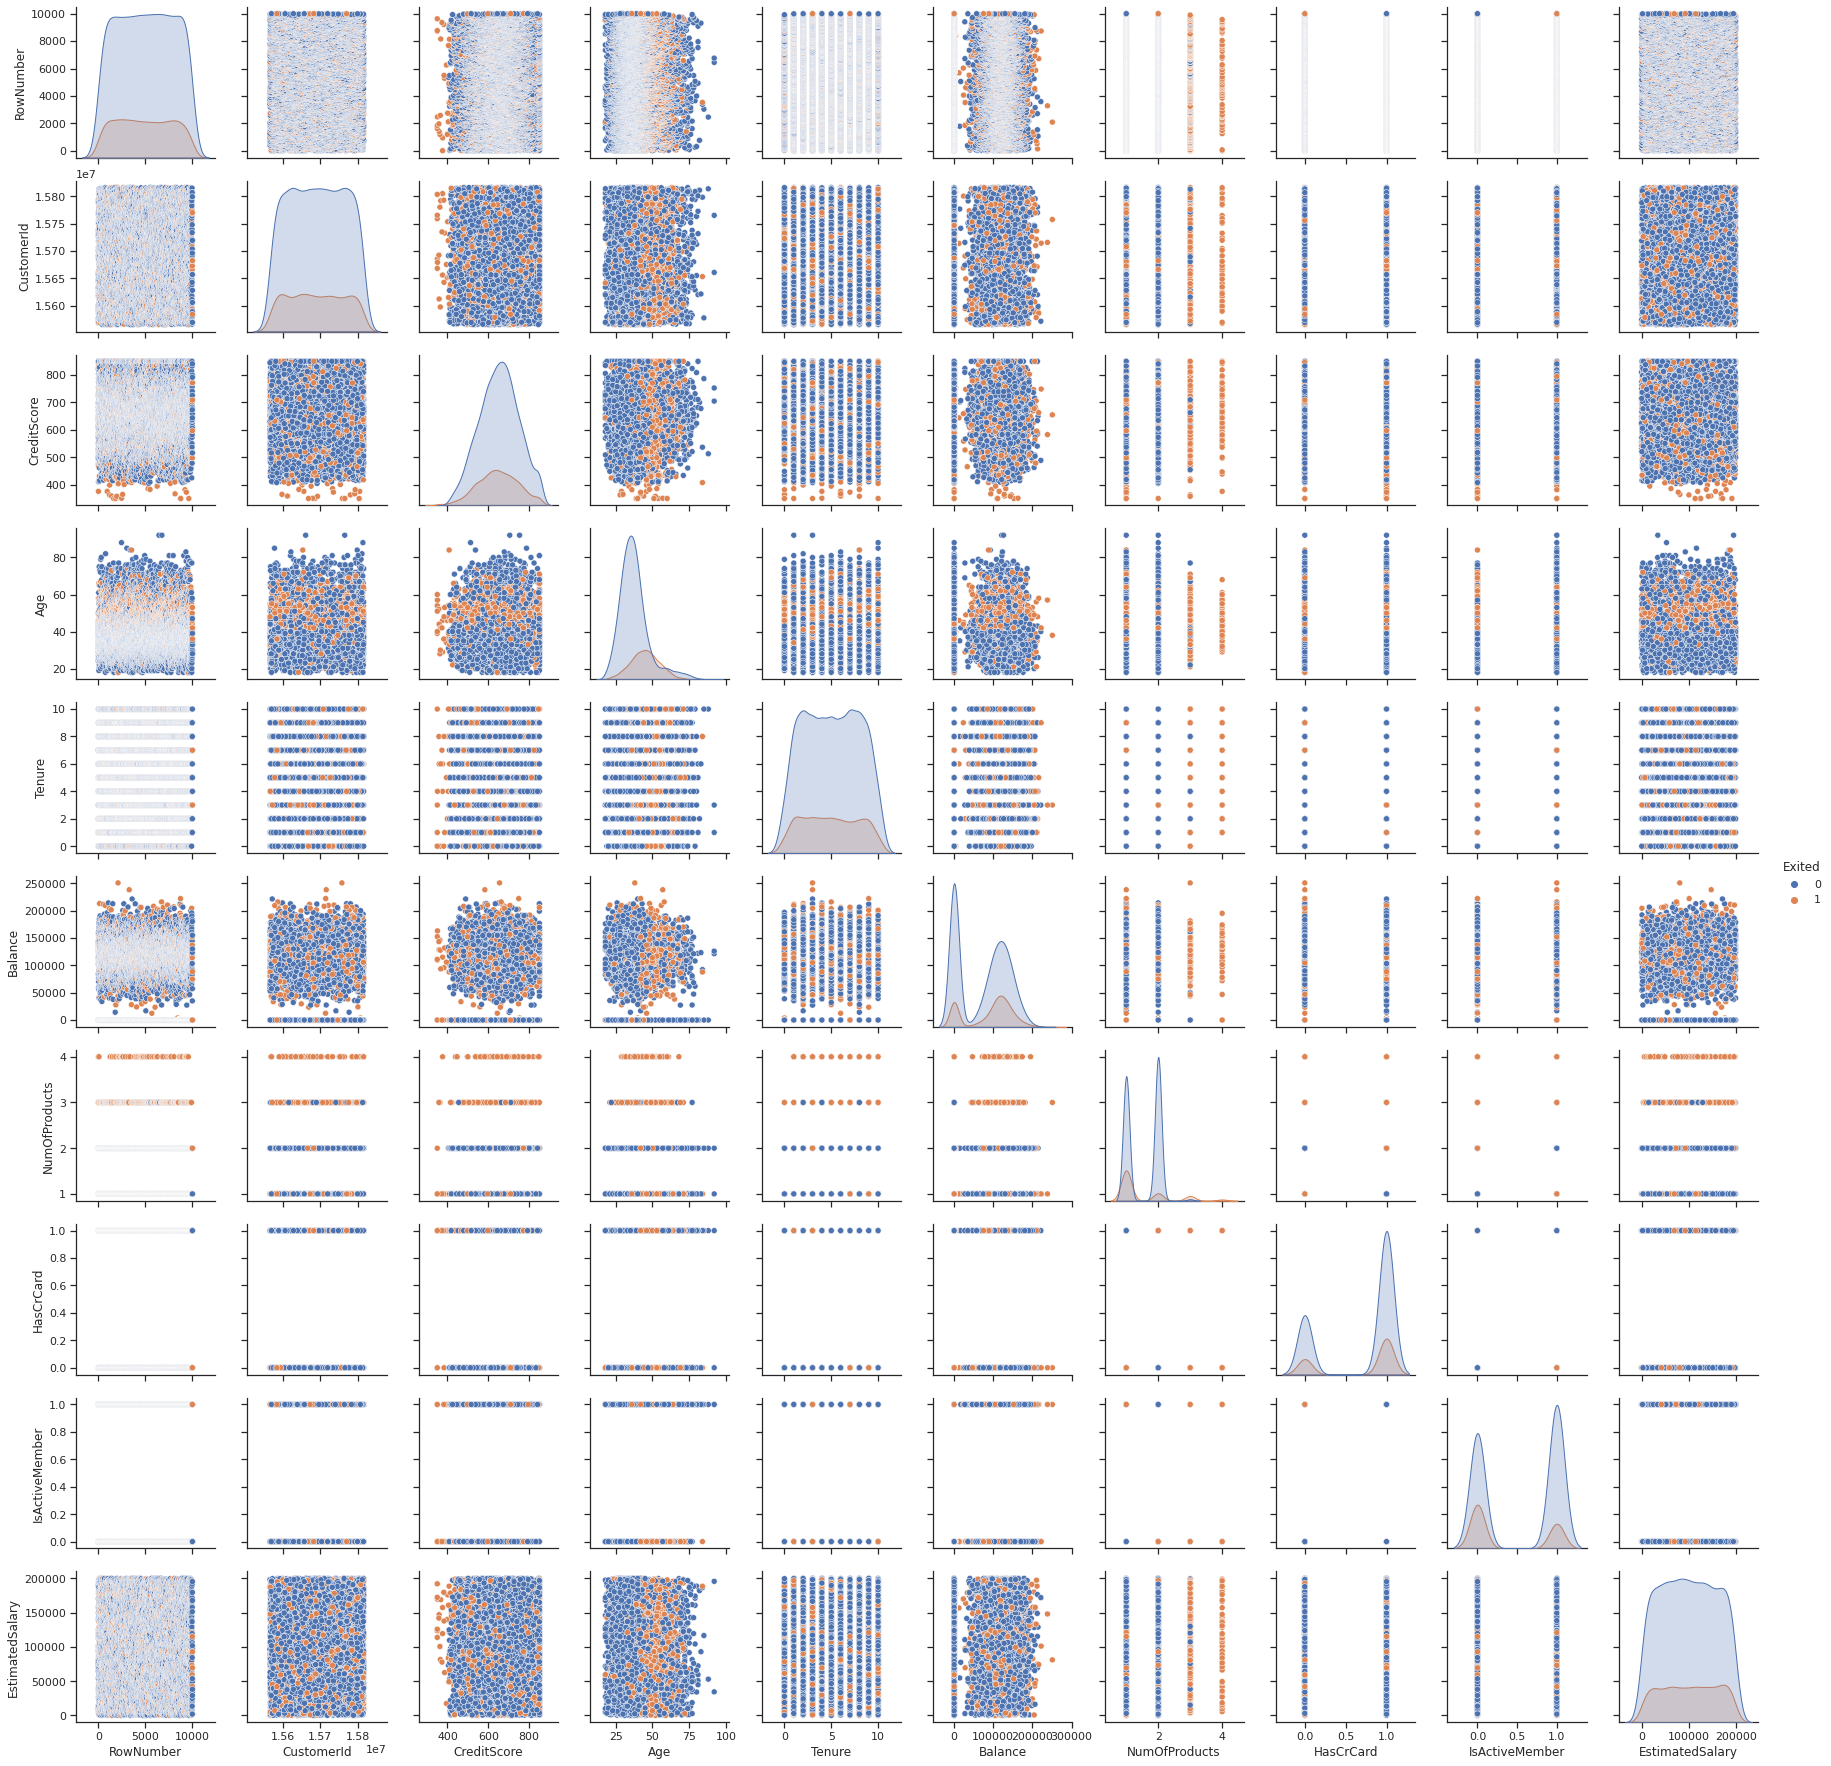

In [ ]:
sns.set(style='ticks')
sns.pairplot(df,hue = 'Exited', diag_kws={'bw': 0.2})

## Data Preprocessing

In [ ]:
ds = df.drop(columns=["RowNumber","CustomerId","Surname"])
ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
ds_GEO=pd.get_dummies(ds['Geography'])
ds_GEN=pd.get_dummies(ds['Gender'])

In [ ]:
ds = pd.concat([ds_GEO,ds_GEN,ds],axis=1)
ds.drop(columns=['Geography','Gender'],inplace=True)
ds.head()

,France,Germany,Spain,Female,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,0,1,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,1,0,0,1,0,502,42,8,159660.80,3,1,0,113931.57,1
3,1,0,0,1,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,1,0,850,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
ds.shape

(10000, 14)

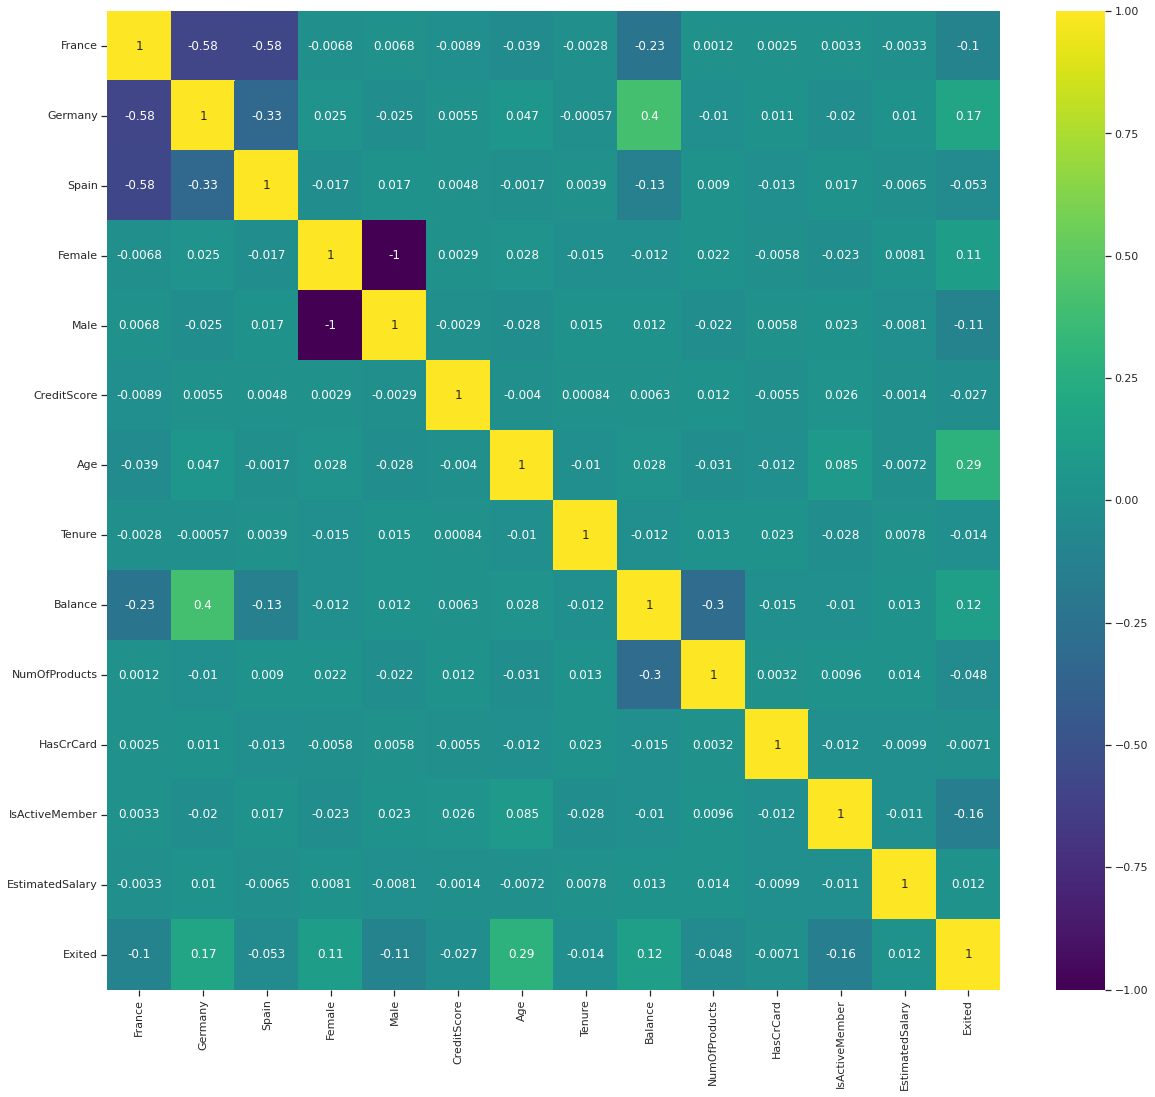

In [ ]:
corr = ds.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr, cmap='viridis', annot=True)

# با توجه به عدم توازن داده ها دو راه کار برای بدست آوردن نتیجه واقعی داریم که روش‌های بازنمونه‌گیری گفته می شود. در چنین روش‌هایی، یا نمونه‌ها از کلاس غالب حذف می‌شوند (کم نمونه‌گیری) و یا نمونه‌های بیشتری به کلاس اقلیت اضافه می‌شوند.


In [ ]:
num_0 = len(ds[ds['Exited']==0])
num_1 = len(ds[ds['Exited']==1])
print(num_0,num_1)
# random undersample
undersampled_data = pd.concat([ ds[ds['Exited']==0].sample(num_1) , ds[ds['Exited']==1] ])
print(len(undersampled_data))
# random oversample
oversampled_data = pd.concat([ ds[ds['Exited']==0] , ds[ds['Exited']==1].sample(num_0, replace=True) ])
print(len(oversampled_data))

7963 2037
4074
15926


# روش اول

In [ ]:
# X = ds.iloc[:,0:12] #predictors
# y = ds.iloc[:,13:] #target

روش دوم

In [ ]:
# X = undersampled_data.iloc[:,0:12] #predictors
# y = undersampled_data.iloc[:,13:] #target

روش سوم

In [ ]:
X = oversampled_data.iloc[:,0:12] #predictors
y = oversampled_data.iloc[:,13:] #target

In [ ]:
X = X.values
y = y.values

## Prepare Data for Machine learning

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

PYchart

In [ ]:
!pip install numpy --upgrade

In [ ]:
import numpy
numpy.version.version

In [ ]:
!pip install scipy --upgrade

In [ ]:
import scipy
scipy.version.version

In [ ]:
!pip install spacy

In [ ]:
!pip install pycaret[full]

In [ ]:
!pip install Jinja2 --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 5.0 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
from pycaret.classification import *
import pandas as pd

ModuleNotFoundError: ignored

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
setup(data = ds,target = 'Exited')

In [ ]:
# classification_setup = setup(data= train_titanic, target='Survived',remove_outliers=True,normalize=True,normalize_method='robust',
#                             ignore_features= ['Name'], silent = True,session_id = 6563)

In [ ]:
best = compare_models()

In [ ]:
top3 = compare_models(n_select=3, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8638,0.8618,0.5136,0.7432,0.6065,0.5276,0.5413,0.273
catboost,CatBoost Classifier,0.8644,0.8669,0.4990,0.7600,0.6005,0.5232,0.5411,4.386
rf,Random Forest Classifier,0.8634,0.8590,0.4815,0.7669,0.5900,0.5133,0.5342,1.112
gbc,Gradient Boosting Classifier,0.8627,0.8697,0.4815,0.7614,0.5887,0.5115,0.5314,0.761
xgboost,Extreme Gradient Boosting,0.8544,0.8477,0.5052,0.7013,0.5862,0.5009,0.5114,1.256
ada,Ada Boost Classifier,0.8514,0.8489,0.4766,0.7039,0.5667,0.4813,0.4954,0.291
et,Extra Trees Classifier,0.8435,0.8376,0.4410,0.6842,0.5357,0.4469,0.4629,0.891
dt,Decision Tree Classifier,0.7947,0.6955,0.5276,0.4980,0.5119,0.3821,0.3827,0.050
lda,Linear Discriminant Analysis,0.8390,0.8392,0.3685,0.7051,0.4834,0.3990,0.4288,0.050
ridge,Ridge Classifier,0.8345,0.0000,0.2764,0.7674,0.4054,0.3334,0.3928,0.024


INFO:logs:create_model_container: 32
INFO:logs:master_model_container: 32
INFO:logs:display_container: 3
INFO:logs:[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5015, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), <catboost.core.CatBoostClassifier object at 0x7f002fb26190>, RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
         

In [ ]:
top3

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=5015, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=5015, verbose=0,
                     

In [ ]:
cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8629,0.8759,0.4825,0.7582,0.5897,0.5122,0.5311
1,0.8771,0.8777,0.5175,0.8132,0.6325,0.5631,0.5838
2,0.8686,0.8544,0.4336,0.8493,0.5741,0.5058,0.5459
3,0.8743,0.8837,0.5105,0.8022,0.6239,0.5529,0.5733
4,0.8529,0.8566,0.4615,0.7174,0.5617,0.4782,0.4951
5,0.8571,0.8569,0.5455,0.6903,0.6094,0.5234,0.5289
6,0.8543,0.8486,0.4583,0.7333,0.5641,0.4822,0.5014
7,0.8657,0.8704,0.5417,0.7358,0.6240,0.5445,0.5540
8,0.8657,0.8587,0.4931,0.7717,0.6017,0.5256,0.5447


INFO:logs:create_model_container: 33
INFO:logs:master_model_container: 33
INFO:logs:display_container: 4
INFO:logs:<catboost.core.CatBoostClassifier object at 0x7f002fcfdc10>
INFO:logs:create_model() succesfully completed......................................


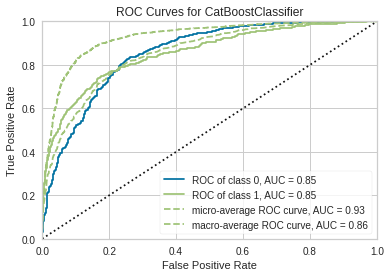

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(estimator=cb,plot='auc')

In [ ]:
plot_model(estimator=cb,plot='feature')

NameError: ignored

## Train your model

In [ ]:
# Decision Tree

dtc = DecisionTreeClassifier()
dtc.fit(X_train_sc,y_train)
y_pred_dtc = dtc.predict(X_test_sc)
dtc_acc = accuracy_score(y_test,y_pred_dtc)
dtc_F1 = f1_score(y_test,y_pred_dtc)

# Logistic Regression

logr = LogisticRegression()
logr.fit(X_train_sc,y_train)
y_pred_logr = logr.predict(X_test_sc)
logr_acc = accuracy_score(y_test,y_pred_logr)
logr_F1 = f1_score(y_test,y_pred_logr)

# K Neighbors Classifier

knn = KNeighborsClassifier( metric='minkowski')
knn.fit(X_train_sc,y_train)
y_pred_knn = knn.predict(X_test_sc)
knn_acc = accuracy_score(y_test,y_pred_knn)
knn_F1 = f1_score(y_test,y_pred_knn)

# Random Forrest

rfc = RandomForestClassifier()
rfc.fit(X_train_sc,y_train)
y_pred_rfc = rfc.predict(X_test_sc)
rfc_acc = accuracy_score(y_test,y_pred_rfc)
rfc_F1 = f1_score(y_test,y_pred_rfc)

# Naive Bayes

nb = GaussianNB()
nb.fit(X_train_sc,y_train)
y_pred_nb= nb.predict(X_test_sc)
nb_acc = accuracy_score(y_test,y_pred_nb)
nb_F1 = f1_score(y_test,y_pred_nb)

# SVM

svm = SVC()
svm.fit(X_train_sc,y_train)
y_pred_svm = svm.predict(X_test_sc)
svm_acc = accuracy_score(y_test,y_pred_svm)
svm_F1 = f1_score(y_test,y_pred_svm)

# XGBoost

xgb = XGBClassifier()
xgb.fit(X_train_sc,y_train)
y_pred_xgb = xgb.predict(X_test_sc)
xgb_acc = accuracy_score(y_test,y_pred_xgb)
xgb_F1 = f1_score(y_test,y_pred_xgb)

In [ ]:
pd.DataFrame({"Algorithms":["Decision Tree","Logistic Regression","K Neighbors Classifier","Random Forest","Naive Bayes","SVM","XGBoost"],
              "Scores":[dtc_acc,logr_acc,knn_acc,rfc_acc,nb_acc,svm_acc,xgb_acc],"F1_score":[dtc_F1,logr_F1,knn_F1,rfc_F1,nb_F1,svm_F1,xgb_F1]})

,Algorithms,Scores,F1_score
0,Decision Tree,0.917137,0.922353
1,Logistic Regression,0.712806,0.713076
2,K Neighbors Classifier,0.814187,0.825985
3,Random Forest,0.946014,0.948130
4,Naive Bayes,0.704018,0.694723
5,SVM,0.801004,0.798985
6,XGBoost,0.793158,0.787488


In [ ]:
from sklearn.model_selection import cross_val_score

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('XGB', XGBClassifier()))
# evaluate each model in turning kfold results
results_boxplot = []
names = []
results_mean = []
results_std = []
p,t = X_train_sc, y_train
for name, model in models:
    cv_results = cross_val_score(model, p,t, cv=10)
    results_boxplot.append(cv_results)
    results_mean.append(cv_results.mean())
    results_std.append(cv_results.std())
    names.append(name)
pd.DataFrame({"Algorithm":names,
                                "Accuracy Mean":results_mean,
                                "Accuracy":results_std})

,Algorithm,Accuracy Mean,Accuracy
0,LR,0.708320,0.005338
1,KNN,0.819780,0.009169
2,DTC,0.910283,0.005450
3,RFC,0.943878,0.007399
4,NB,0.705495,0.012184
5,SVC,0.795761,0.007286
6,XGB,0.793799,0.008699


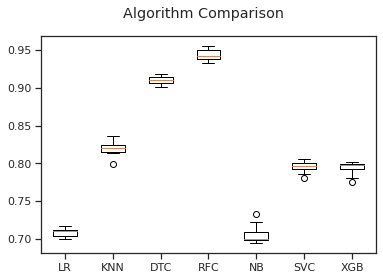

In [ ]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_boxplot)
ax.set_xticklabels(names)
plt.show()

## Test the model and show the metrics

In [ ]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

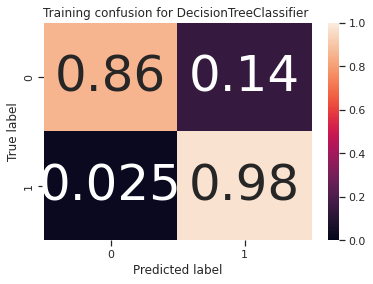

In [ ]:
from sklearn.metrics import  confusion_matrix, r2_score
y_pred = dtc.predict(X_test_sc)

# Plotting Confusion Matrix of DecisionTreeClassifier
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dtc.classes_, title='Training confusion for DecisionTreeClassifier ')

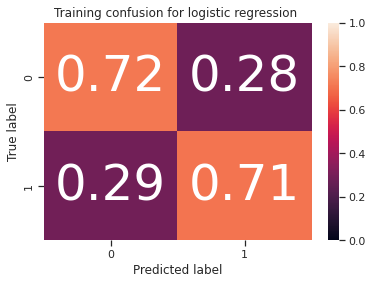

In [ ]:
y_pred = logr.predict(X_test_sc)

# Plotting Confusion Matrix of logistic regression
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dtc.classes_, title='Training confusion for logistic regression ')

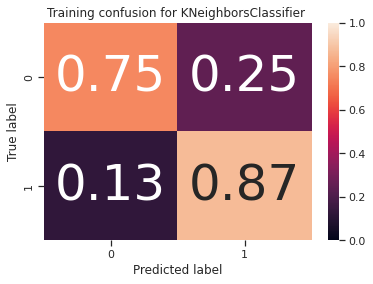

In [ ]:
y_pred = knn.predict(X_test_sc)

# Plotting Confusion Matrix of KNeighborsClassifier
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dtc.classes_, title='Training confusion for KNeighborsClassifier ')

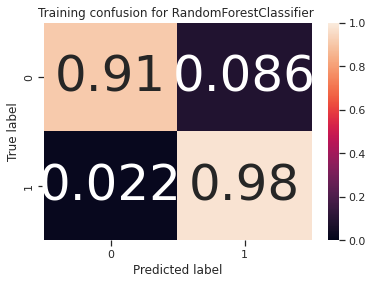

In [ ]:
y_pred = rfc.predict(X_test_sc)

# Plotting Confusion Matrix of RandomForestClassifier
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dtc.classes_, title='Training confusion for RandomForestClassifier ')

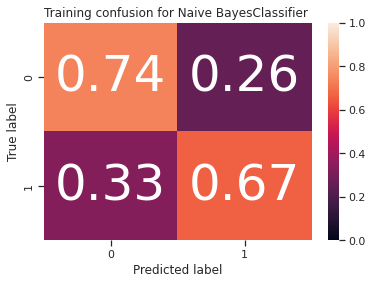

In [ ]:
y_pred = nb.predict(X_test_sc)

# Plotting Confusion Matrix of Naive BayesClassifier
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dtc.classes_, title='Training confusion for Naive BayesClassifier ')

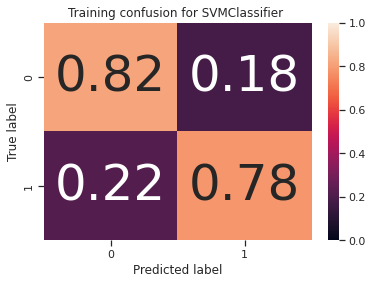

In [ ]:
y_pred = svm.predict(X_test_sc)

# Plotting Confusion Matrix of SVMClassifier
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dtc.classes_, title='Training confusion for SVMClassifier ')

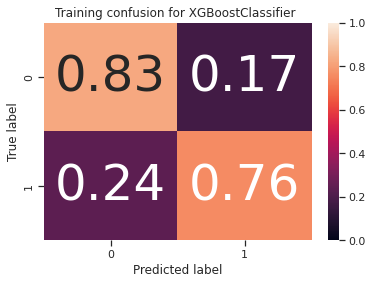

In [ ]:
y_pred = xgb.predict(X_test_sc)

# Plotting Confusion Matrix of XGBoostClassifier
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dtc.classes_, title='Training confusion for XGBoostClassifier ')

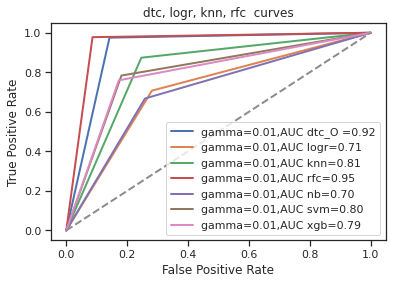

In [ ]:


#fpr = False Positive Rate (taux des false positive)
#tpr = True Positive Rate (taux des true positive)
#thr = Permet la modification du seillage (Pas = [0.1] ou [0.2], etc..): cela est définie automatiquement par l'algorithme en fontion des matrices de confusion
fpr,tpr,thr = metrics.roc_curve(y_test,y_pred_dtc)
fpr2,tpr2,thr2 = metrics.roc_curve(y_test,y_pred_logr)
fpr3,tpr3,thr3 = metrics.roc_curve(y_test,y_pred_knn)
fpr4,tpr4,thr4 = metrics.roc_curve(y_test,y_pred_rfc)
fpr5,tpr5,thr5 = metrics.roc_curve(y_test,y_pred_nb)
fpr6,tpr6,thr6 = metrics.roc_curve(y_test,y_pred_svm)
fpr7,tpr7,thr7 = metrics.roc_curve(y_test,y_pred_xgb)

#auc = aerea under cuve = plus que 'auc' soit  grande plus quelle soit élevée par rapport aux autres courbes
#la plus grande auc est constitue le meilleur algorithme
auc = metrics.auc(fpr,tpr)
auc2 = metrics.auc(fpr2,tpr2)
auc3 = metrics.auc(fpr3,tpr3)
auc4 = metrics.auc(fpr4,tpr4)
auc5 = metrics.auc(fpr5,tpr5)
auc6 = metrics.auc(fpr6,tpr6)
auc7 = metrics.auc(fpr7,tpr7)

#plot = affichage des informations explicatives sur la figure
plt.plot(fpr,tpr,'-',lw=2,label='gamma=0.01,AUC dtc_O =%.2f'%auc)
plt.plot(fpr2,tpr2,'-',lw=2,label='gamma=0.01,AUC logr=%.2f'%auc2)
plt.plot(fpr3,tpr3,'-',lw=2,label='gamma=0.01,AUC knn=%.2f'%auc3)
plt.plot(fpr4,tpr4,'-',lw=2,label='gamma=0.01,AUC rfc=%.2f'%auc4)
plt.plot(fpr5,tpr5,'-',lw=2,label='gamma=0.01,AUC nb=%.2f'%auc5)
plt.plot(fpr6,tpr6,'-',lw=2,label='gamma=0.01,AUC svm=%.2f'%auc6)
plt.plot(fpr7,tpr7,'-',lw=2,label='gamma=0.01,AUC xgb=%.2f'%auc7)



plt.plot([0, 1], [0, 1], lw=2, linestyle='--')

#
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('dtc, logr, knn, rfc  curves')
plt.legend(loc='lower right')

In [ ]:
# # Grid search for Random Forest Classifier
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'max_leaf_nodes': list(range(2, 100)),
#     'min_samples_split': [2, 3, 4],
# }
# CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5, scoring='accuracy')
# CV_dtc.fit(X_train_sc, y_train)
# best_parameters = CV_dtc.best_params_
# pd.DataFrame(best_parameters.values(),best_parameters.keys(),columns=["Best Parameters"])

In [ ]:
# Grid search for Random Forest Classifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring='accuracy')
CV_rfc.fit(X_train_sc, y_train)
best_parameters = CV_rfc.best_params_
pd.DataFrame(best_parameters.values(),best_parameters.keys(),columns=["Best Parameters"])

,Best Parameters
bootstrap,True
max_depth,80
max_features,3
min_samples_leaf,3
min_samples_split,8


In [ ]:
# Random Forrest best

rfc = RandomForestClassifier()
rfc.fit(X_train_sc,y_train)
y_pred_rfc = rfc.predict(X_test_sc)
rfc_acc = accuracy_score(y_test,y_pred_rfc)
rfc_F1 = f1_score(y_test,y_pred_rfc)

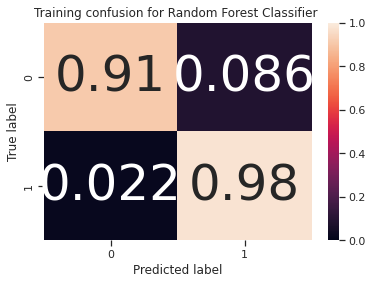

In [ ]:
y_pred = rfc.predict(X_test_sc)

# Plotting Confusion Matrix of Random Forest Classifier
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rfc.classes_, title='Training confusion for Random Forest Classifier ')

In [ ]:
print("Best score is: ",CV_rfc.best_score_)

Best score is:  0.8910518053375197


## Save your final model

In [ ]:
#Saving best model
import joblib
#Sava the model to disk
filename = 'model_dtc.sav'
joblib.dump(CV_rfc, filename)

['model_dtc.sav']

## Send us the Result (Maktabkhoone)